In [4]:
### Import necessary modules
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

In [5]:

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

In [6]:

import numpy as np
import pandas as pd

#df = vv.dataset_modelling_version(iteration_code="0042_20220710", row_limit=750)
df = vv.dataset_modelling_version(iteration_code="0042_20220710")
print(df.shape)
df.head(20)

df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=[])

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:391: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 22847/48144/42901/43432/16764 ==> 22847/38606/38396/38403/16764
type <class 'pandas.core.indexes.base.Index'>
Index(['Price', 'location.latitude', 'location.longitude',
       'distance_to_any_train', 'bedrooms_model', 'bathrooms_model',
       'analyticsProperty.imageCount', 'analyticsProperty.added',
       'floorplan_count', 'property_age', 'borough_name_Barking and Dagenham',
       'borough_name_Barnet', 'borough_name_Bexley',
       'borough_name_City of London', 'borough_name_Croydon',
       'borough_name_Ealing', 'borough_name_Enfield', 'borough_name_Greenwich',
       'borough_name_Havering', 'borough_name_Hillingdon',
       'borough_name_Hounslow', 'borough_name_Islington',
       'borough_name_Kensington and Chelsea',
       'borough_name_Kingston upon Thames', 'borough_name_Lambeth',
       'borough_name_Lewisham', 'borough_name_Merton', 'borough_name_Newham',
       'borough_name_Redbridge', 'borough_name_Richmond upon Thames',
       'borough_name_Sou

In [7]:
df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=['property_age'],
                     na_drop_rows=['analyticsProperty.imageCount', 'analyticsProperty.added'])

In [8]:
if False:
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    from sklearn.base import BaseEstimator, TransformerMixin

    # column index
    rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


    class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
            self.add_bedrooms_per_room = add_bedrooms_per_room

        def fit(self, X, y=None):
            return self  # nothing else to do

        def transform(self, X):

            return X

            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            population_per_household = X[:, population_ix] / X[:, households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
                return np.c_[X, rooms_per_household, population_per_household,
                             bedrooms_per_room]
            else:
                return np.c_[X, rooms_per_household, population_per_household]


    # num_pipeline = Pipeline([
    #     ('imputer', SimpleImputer(strategy='median')),
    #     ('attribs_adder', CombinedAttributesAdder())
    #     ('std_scaler', StandardScaler())
    # ])

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

    housing_num_tr = num_pipeline.fit_transform(df)

In [9]:
# df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=['property_age'],
#                      na_drop_rows=['analyticsProperty.imageCount', 'analyticsProperty.added'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20866 entries, 125007572 to 114438299
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Price                                              20866 non-null  float64
 1   location.latitude                                  20864 non-null  float64
 2   location.longitude                                 20866 non-null  float64
 3   distance_to_any_train                              20866 non-null  float64
 4   bedrooms_model                                     20866 non-null  float64
 5   bathrooms_model                                    20866 non-null  float64
 6   analyticsProperty.imageCount                       20857 non-null  float64
 7   analyticsProperty.added                            20857 non-null  float64
 8   floorplan_count                                    20866 non-null  float64
 9  

In [11]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
114848993,399950.0,51.466851,-0.089247,0.1,2.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,0,1,0
119910368,597800.0,51.549625,0.012491,0.4,3.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
85408299,550000.0,51.540910,0.041020,0.5,3.0,2.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
85678761,450000.0,51.529636,0.041106,0.5,3.0,1.0,NaN,NaN,1.0,0,...,0,0,0,0,0,0,0,1,0,0
111021971,450000.0,51.516700,0.011734,0.3,2.0,2.0,NaN,NaN,5.0,0,...,0,0,0,0,0,0,0,0,1,0
117355082,450000.0,51.515757,0.009116,0.1,2.0,2.0,NaN,NaN,9.0,0,...,0,0,0,0,0,0,0,0,1,0
124072790,425000.0,51.527119,0.033711,0.6,2.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
124159469,400000.0,51.516920,0.019190,0.5,2.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,0,0,0
114709187,368000.0,51.499270,0.026050,0.3,2.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
df.dropna(inplace=True)

In [13]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [14]:
from sklearn import linear_model

#reg = linear_model.LinearRegression()
#reg = linear_model.Ridge(alpha=.5)
reg = linear_model.Ridge(alpha=.5)

#reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.fit(X_train, y_train)
LinearRegression()
reg.coef_


array([ 2.72071067e+05, -9.75517646e+04, -3.25184565e+04,  3.93840825e+04,
        4.05980782e+04,  2.19303676e+03,  1.09118742e+00,  1.82216929e+03,
       -3.97763253e+04,  6.77560103e+04,  9.75383193e+03,  1.15118621e+05,
        1.00391898e+04,  3.54699064e+03, -2.98979334e+04,  1.28545079e+04,
       -3.57434455e+04, -8.79139324e+03, -3.23556813e+04,  1.30120413e+05,
        7.97598646e+04,  1.83551525e+04,  1.76526906e+04, -4.77730876e+04,
       -1.74930663e+04, -8.30214403e+04, -7.55183127e+04,  8.40467785e+03,
       -3.73063979e+04, -2.06507283e+04, -3.25155922e+04, -8.73093189e+04,
        9.11156264e+02,  7.38796164e+04,  4.98854287e+04, -2.31933275e+04,
       -4.97513263e+04,  4.36123240e+04,  0.00000000e+00, -2.05530988e+04,
        4.27321836e+04, -1.84376328e+04,  2.89988403e+04, -2.31933275e+04,
        1.68646601e+04,  2.46438574e+04,  5.40513076e+04,  2.99052238e+04,
       -3.24946543e+03,  2.71542175e+04,  1.81535034e+04,  3.10510400e+04,
       -2.14080033e+05, -

Mean squared error: 5548475959.19
Coefficient of determination: 0.55
[384925.10738928 427667.11861895 380530.76703897 ... 421059.79691885
 353526.75006507 485430.29168946]


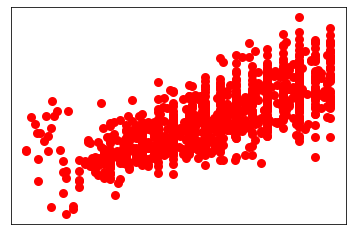

In [15]:
from matplotlib import pyplot as plt

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# The coefficients
#print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

print(y_pred)
# Plot outputs
#plt.scatter(X_test, y_test, color="black")
#plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.scatter(y_test, y_pred, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
if False:
    from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
    from sklearn.svm import SVC

    param_grid = [
        {"kernel": ["linear"]},
        {"kernel": ["poly"], "degree": [2, 3]},
        {"kernel": ["rbf"]},
    ]

    svc = SVC(random_state=0)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

    search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc", cv=cv)
    search.fit(X, y)

Now working on LinR model...
   LinR cross-validating...
   LinR fitting...
   LinR predicting...
LinR


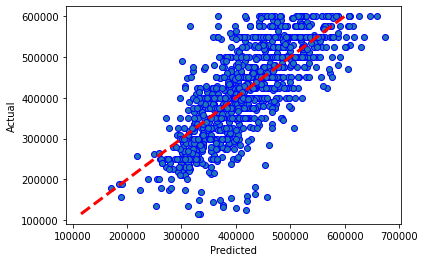

Now working on RF model...
   RF cross-validating...
   RF fitting...
   RF predicting...
RF


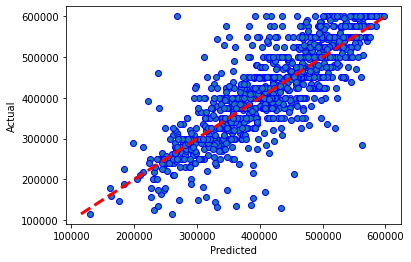

Now working on KNN model...
   KNN cross-validating...
   KNN fitting...
   KNN predicting...
KNN


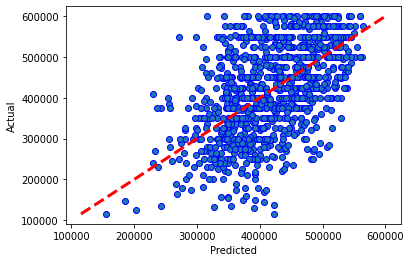

Now working on SVM model...
   SVM cross-validating...
   SVM fitting...
   SVM predicting...
SVM


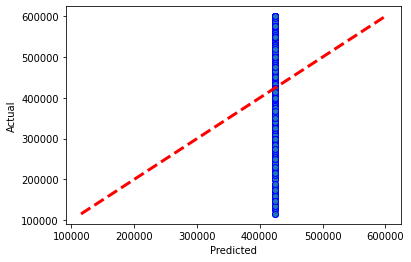

Now working on GNB model...
   GNB cross-validating...
   GNB fitting...
   GNB predicting...
GNB


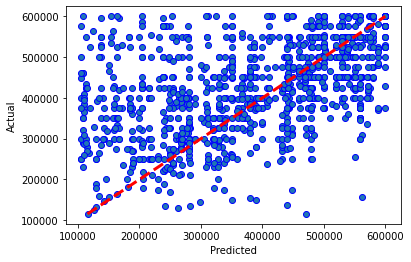

Now working on NEW - Ridge LR model...
   NEW - Ridge LR cross-validating...
   NEW - Ridge LR fitting...
   NEW - Ridge LR predicting...
NEW - Ridge LR


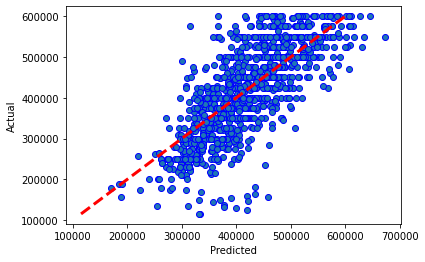

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_neg_mean_poisson_deviance,test_neg_mean_gamma_deviance
0,LinR,1,0.266975,0.011856,-59582.425818,-5.940408e+09,-77074.042547,-15033.888356,-0.040484
1,LinR,2,0.220503,0.007951,-60376.217134,-6.031224e+09,-77660.958088,-15289.284939,-0.041260
2,LinR,3,0.190164,0.021340,-60557.379503,-6.205165e+09,-78772.869470,-15896.726803,-0.043529
3,LinR,4,0.242545,0.019319,-60610.695702,-6.047402e+09,-77765.042097,-15382.665570,-0.041932
4,LinR,5,0.233593,0.021209,-59906.924504,-6.005672e+09,-77496.268317,-15216.884816,-0.042574
5,RF,1,16.075077,0.148906,-46875.684066,-4.284100e+09,-65453.034101,-10886.804317,-0.029576
6,RF,2,14.166925,0.144631,-47830.047189,-4.383022e+09,-66204.396354,-11317.373336,-0.031330
7,RF,3,15.009083,0.154524,-47780.639437,-4.538176e+09,-67365.982675,-11766.846886,-0.032836
8,RF,4,13.575381,0.142304,-47838.817104,-4.322607e+09,-65746.534734,-10961.337177,-0.029801
9,RF,5,15.164547,0.131904,-45765.635163,-4.067067e+09,-63773.561335,-10364.847143,-0.028182


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd


def run_exps(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []

    models = [
        #('LogReg Cl', LogisticRegression()),
        #('RF Cl', RandomForestClassifier()),
        #('KNN Cl', KNeighborsClassifier()),
        #('SVM Cl', SVC()),
        ('LinR', LinearRegression()),
        ('RF', RandomForestRegressor()),
        ('KNN', KNeighborsRegressor()),
        ('SVM', SVR()),
        ('GNB', GaussianNB()),
        #          ('XGB', XGBClassifier())
        ('NEW - Ridge LR', linear_model.Ridge(alpha=.5))
    ]

    results = []
    names = []

    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance']
    # ,'d2_absolute_error_score','d2_pinball_score','d2_tweedie_score'
    target_names = ['malignant', 'benign']
    for name, model in models:
        print(f"Now working on {name} model...")
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        print(f"   {name} cross-validating...")
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        print(f"   {name} fitting...")
        clf = model.fit(X_train, y_train)
        print(f"   {name} predicting...")
        y_pred = clf.predict(X_test)
        print(name)
        mae = metrics.mean_absolute_error(y_test, y_pred)  # NEW
        mse = metrics.mean_squared_error(y_test, y_pred)  # NEW
        r2 = metrics.r2_score(y_test, y_pred)  # NEW
        #print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        #this_df['model'] = name
        this_df.insert(loc=0, column='model', value=name)
        this_df.insert(loc=1, column='run', value=range(1, 6))
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)

        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        plt.show()

    #final.insert(loc=0, column='model2', value=names)
    return final


multi_model_evaluation = run_exps(X_train, y_train, X_test, y_test)
multi_model_evaluation

In [18]:
multi_model_evaluation.sort_values('test_neg_mean_squared_error')
multi_model_evaluation.sort_values('test_neg_mean_absolute_error',ascending=False)

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_neg_mean_poisson_deviance,test_neg_mean_gamma_deviance
9,RF,5,15.164547,0.131904,-45765.635163,-4.067067e+09,-63773.561335,-10364.847143,-0.028182
5,RF,1,16.075077,0.148906,-46875.684066,-4.284100e+09,-65453.034101,-10886.804317,-0.029576
7,RF,3,15.009083,0.154524,-47780.639437,-4.538176e+09,-67365.982675,-11766.846886,-0.032836
6,RF,2,14.166925,0.144631,-47830.047189,-4.383022e+09,-66204.396354,-11317.373336,-0.031330
8,RF,4,13.575381,0.142304,-47838.817104,-4.322607e+09,-65746.534734,-10961.337177,-0.029801
25,NEW - Ridge LR,1,0.046547,0.011140,-59579.642335,-5.939147e+09,-77065.859376,-15032.017504,-0.040482
0,LinR,1,0.266975,0.011856,-59582.425818,-5.940408e+09,-77074.042547,-15033.888356,-0.040484
4,LinR,5,0.233593,0.021209,-59906.924504,-6.005672e+09,-77496.268317,-15216.884816,-0.042574
29,NEW - Ridge LR,5,0.151531,0.016440,-59914.526349,-6.008902e+09,-77517.107746,-15219.274211,-0.041846
1,LinR,2,0.220503,0.007951,-60376.217134,-6.031224e+09,-77660.958088,-15289.284939,-0.041260
